In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import copy

In [2]:
map = (100, 100)
nuc = np.array([[0, 0]])
all_mol = []
all_pos = []

In [3]:
class Molecule:
    def __init__(self):
        self.pos = [self.spawn()]
        
    def spawn(self):
        global all_mol
        while True:
            pos = np.array([np.random.randint(0, map[0] + 1), np.random.randint(0, map[1] + 1)])
            if any([any([i.all() for i in pos == mol.pos]) for mol in all_mol]):
                continue
            return pos
        
    def cluster(self, index):
        i = 0
        while i != len(self.pos):
            self.merge_neighb(i, index)
            i += 1
        
    def merge_neighb(self, which_mol, index):
        global all_mol
        short_pos_list = [all_mol[i].pos for i in range(index + 1, len(all_mol) - 1)]
        neighb = [[(abs((self.pos[which_mol] - i)[0]) + abs((self.pos[which_mol] - i)[1])) == 1
                   for i in mol] for mol in short_pos_list]
        candidates = []
        for mol in range(0, len(neighb) - 1):
            if any(neighb[mol]):
                candidates.append(mol + index + 1)
        candidates.reverse()
        for i in candidates:
            for j in all_mol[i].pos:
                self.pos.append(j)
            del all_mol[i]
        
    def move(self):
        global all_pos
        if np.random.rand() > 0.5:
            dir = np.array([0, np.random.choice([-1, 1])])
        else:
            dir = np.array([np.random.choice([-1, 1]), 0])
        pot_pos = copy.deepcopy(self.pos)
        for i in pot_pos:
            i += dir
        if sum([any([any([i.all() for i in pos == mol.pos]) for pos in pot_pos]) for mol in all_mol]) <= 1:
            self.pos = pot_pos
        

In [4]:
# Visualisiert die Moleküle
def plot():
    print(len(all_pos))
    plt.figure(figsize=(10, 10))
    plt.scatter(*np.array([item for sublist in all_pos for item in sublist]).T, marker = 's')
    #plt.axis([-1, map[0]+1, -1, map[0]+1])
    plt.show()

In [5]:
def cluster(all_mol):
    i = 0
    while i < len(all_mol): # <, da der letzte keinen Nachbarn ahben kann, bzw. schon alle hat
        all_mol[i].cluster(i)
        i += 1
        
def step(all_mol):
    i = 0
    while i < len(all_mol): # <, da der letzte keinen Nachbarn ahben kann, bzw. schon alle hat
        all_mol[i].move()
        all_mol[i].cluster(i)
        i += 1

In [6]:
def pos_list(all_pos):
    for mol in all_mol:
        all_pos.append(mol.pos)

In [7]:
# spawnt alles Moleküle

all_mol = []

for i in range(500):
    new_mol = Molecule()
    all_mol.append(new_mol)

In [8]:
# vereint benachbarte Moleküle

cluster(all_mol)

In [9]:
all_pos = []
pos_list(all_pos)

In [10]:
len(all_pos)

451

451


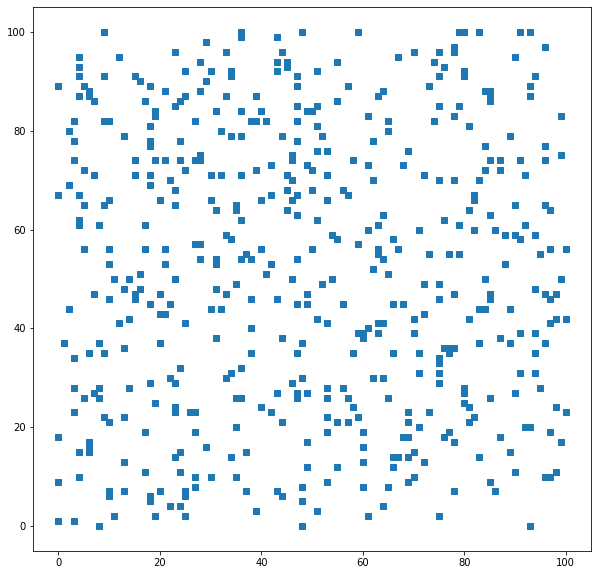

In [11]:
plot()

326


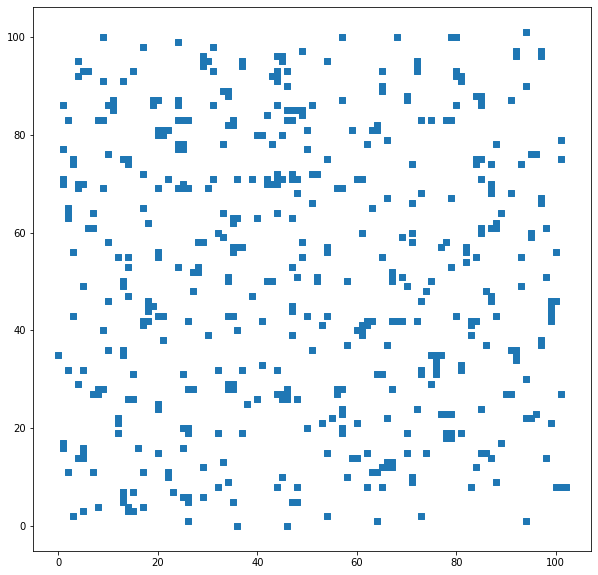

In [12]:
for i in range(10):
    clear_output(wait=True)
    step(all_mol)
    all_pos = []
    pos_list(all_pos)
    plot()